# Assignment 2: KNN luokittelija

## 1. Business understanding

Fetch the diagnostic Wisconsin breast cancer dataset from the link ([https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)) and study the associated description. The problem task consists of building a classifier using the kNN algorithm to predict the binary-valued target variable "Diagnosis" in the data. Also, the performance of the classifier must be investigated and reported.  



## 2. Data understanding

-Investigate the contents of the dataset and include a brief description of its variables.

Here we fetch the dataset using the provided import method for python. We also print metadata for the dataset, and information on contained variables.

In [86]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets.values.ravel()
  
# variable information 
display(breast_cancer_wisconsin_diagnostic.variables)

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Categorical,None,None,None,no
1,Diagnosis,Target,Categorical,None,None,None,no
2,radius1,Feature,Continuous,None,None,None,no
3,texture1,Feature,Continuous,None,None,None,no
4,perimeter1,Feature,Continuous,None,None,None,no
5,area1,Feature,Continuous,None,None,None,no
6,smoothness1,Feature,Continuous,None,None,None,no
7,compactness1,Feature,Continuous,None,None,None,no
8,concavity1,Feature,Continuous,None,None,None,no
9,concave_points1,Feature,Continuous,None,None,None,no


The variables contained in this dataset are:
    1) ID number
    2) Diagnosis (M = malignant, B = benign) 
	3) radius (mean of distances from center to points on the perimeter)
	4) texture (standard deviation of gray-scale values)
	5) perimeter
	6) area
	7) smoothness (local variation in radius lengths)
	8) compactness (perimeter^2 / area - 1.0)
	9) concavity (severity of concave portions of the contour)
	10) concave points (number of concave portions of the contour)
	11) symmetry 
	12) fractal dimension ("coastline approximation" - 1)
	
Measurements provided are taken in three planes, with 1-3 included in variable names.

## 3. Data preparation

Here we apply standardization to the numerical values of the input variables.

In [87]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

display(X_scaled.head())

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


By standardizing values we make sure that large values don't skew the learning process of the model based on high-value columns.

## 4. Modeling

Here we extract 70% of the data for training data, and 30% of the data for testing. We chose k value of 5 for best results.


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Splitting dataset for training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=666)

# Creating the classifier
knn = KNeighborsClassifier(n_neighbors=9)

# Training
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

## 5. Evaluation

-Testing the performance of the classifier and present the associated confusion matrix together with the most common evaluation metrics (accuracy, precision and recall).

In [89]:
# testing the predictions
y_pred = knn.predict(X_test)

# Calculate and print the accuracy of the classifier on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN classifier on the test set: {accuracy_test:.2f}")

Accuracy of kNN classifier on the test set: 0.97


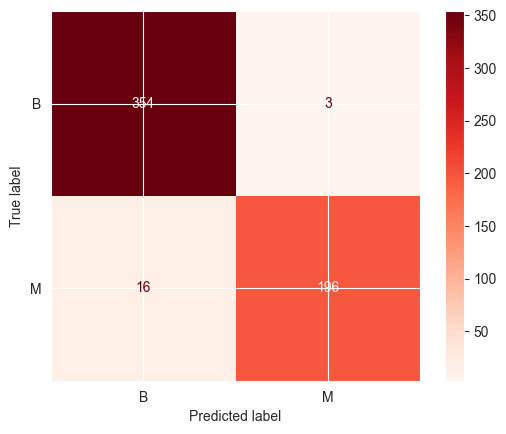

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels

labels = unique_labels(y, y_pred)
y_pred = knn.predict(X_scaled)
cm = confusion_matrix(y, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(cmap="Reds")

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, pos_label='M')  
recall = recall_score(y, y_pred, pos_label='M')

display(f"Accuracy: {accuracy:.2f}")
display(f"Precision: {precision:.2f}")
display(f"Recall: {recall:.2f}")

'Accuracy: 0.97'

'Precision: 0.98'

'Recall: 0.92'

Accuracy = 97% of all predictions are correct<br>
Precision = Of all the cases model predicted as positive 98% are true<br>
Recall = 92% of all actual positive cases were identified


---

## 6. Deployment

This model could be used by analyzing data taken from test persons from outside the training and test groups. By analyzing the given variables the model would then predict the diagnosis. The model could be integrated as part of a cancer screening pipeline, and a system to display the analysis results.